# Unit 5 - Financial Planning

In [116]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [117]:
# Load .env enviroment variables
load_dotenv()

True

In [118]:
# Get the API key using os.getenv

alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

In [119]:
# Confirm retrieval of API key
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [120]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [121]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

shares_data = {
    "Portfolio": [1.2, 5.3]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

In [122]:
# Display shares data
df_shares

,Portfolio
BTC,1.2
ETH,5.3


In [123]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=AUD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=AUD"

In [124]:
# Fetch current BTC price
# YOUR CODE HERE!

my_btc_value = requests.get(btc_url).json()
my_btc_value

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18966181,
   'total_supply': 18966181,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 38883.0,
     'volume_24h': 20417585025,
     'market_cap': 737369863861,
     'percentage_change_1h': 0.346252678521344,
     'percentage_change_24h': 4.24658817016708,
     'percentage_change_7d': -12.7678996628926,
     'percent_change_1h': 0.346252678521344,
     'percent_change_24h': 4.24658817016708,
     'percent_change_7d': -12.7678996628926}},
   'last_updated': 1645610034}},
 'metadata': {'timestamp': 1645610034,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [125]:
# Fetch current ETH price
# YOUR CODE HERE!

my_eth_value = requests.get(eth_url).json()
my_eth_value

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 119697221,
   'total_supply': 119697221,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2719.94,
     'volume_24h': 15259420835,
     'market_cap': 325435433207,
     'percentage_change_1h': 0.403877543916005,
     'percentage_change_24h': 6.42119787801079,
     'percentage_change_7d': -14.4483145173572,
     'percent_change_1h': 0.403877543916005,
     'percent_change_24h': 6.42119787801079,
     'percent_change_7d': -14.4483145173572}},
   'last_updated': 1645610009}},
 'metadata': {'timestamp': 1645610009,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [172]:
# Compute current value of my crpto

btc_price_USD = my_btc_value['data']['1']['quotes']['USD']['price']
print(f"Bitcoin Price USD = ${btc_price_USD} USD")
btc_price_AUD = btc_price_USD / .70
print(f"Bitcoin Price AUD = ${btc_price_AUD} AUD")
my_btc_portfolio_USD = my_btc * btc_price_USD
my_btc_portfolio_AUD = my_btc * btc_price_AUD

eth_price_USD = my_eth_value['data']['1027']['quotes']['USD']['price']
print(f"Etherium Price USD = ${eth_price_USD} USD")
eth_price_AUD = eth_price_USD / .70 
print(f"Etherium Price AUD = ${eth_price_AUD} AUD")
my_eth_portfolio_USD = my_eth * eth_price_USD
my_eth_portfolio_AUD = my_eth * eth_price_AUD

Bitcoin Price USD = $38883.0 USD
Bitcoin Price AUD = $55547.14285714286 AUD
Etherium Price USD = $2719.94 USD
Etherium Price AUD = $3885.628571428572 AUD


In [171]:
# Compute current value of my crpto
# YOUR CODE HERE!

print(f"Bitcoin current price is ${my_eth_portfolio_AUD}")
print(f"Etherium current price is ${my_eth_portfolio_AUD}")

Bitcoin current price is $20593.83142857143
Etherium current price is $20593.83142857143


In [128]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_portfolio_USD:0.2f} USD")
print(f"The current value of your {my_eth} ETH is ${my_eth_portfolio_USD:0.2f} USD")
print(f"The current value of your {my_btc} BTC is ${my_btc_portfolio_AUD:0.2f} AUD")
print(f"The current value of your {my_eth} ETH is ${my_eth_portfolio_AUD:0.2f} AUD")

The current value of your 1.2 BTC is $46659.60 USD
The current value of your 5.3 ETH is $14415.68 USD
The current value of your 1.2 BTC is $66656.57 AUD
The current value of your 5.3 ETH is $20593.83 AUD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [129]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [130]:
## Set Alpaca API key and secret
## YOUR CODE HERE!

alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')


#Test API
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

<class 'str'>
<class 'str'>


In [131]:
# Format current date as ISO format
# YOUR CODE HERE!

start_date = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df


C:\Users\antho\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:22: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


In [132]:
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.30   
2020-07-15 00:00:00-04:00  118.50  118.70  118.50  118.635  3108307  322.41   
2020-07-16 00:00:00-04:00  118.83  118.89  118.74  118.790  3215937  319.79   
2020-07-17 00:00:00-04:00  118.94  118.99  118.77  118.860  2451388  321.88   
2020-07-20 00:00:00-04:00  119.03  119.06  118.91  118.980  3453764  321.43   

                                                               
                             high      low    close    volume  
time                                                           
2020-07-14 00:00:00-04:00  319.76  312.000  318.890  79292036  
2020-07-15 00:00:00-04:00  323.04  319.265  321.865  75854842  
2020-07-16 00:00:00-04:00  321.28  319.090  320.810  47848514  
2020-07-17 00:00:00-04:00  322.57  319.735  321.670  53682925  
2020-07-20 00:00:00-04:00  325.13  320.620  324.360  48315472

In [169]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = df_portfolio["AGG"]["close"].tail(1).sum()
spy_close_price = df_portfolio["SPY"]["close"].tail(1).sum()

In [170]:
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.12
Current SPY closing price: $476.15


In [214]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15944.50
The current value of your 200 AGG shares is $23731.00


### Savings Health Analysis

In [302]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!

total_crypto_value = my_btc_portfolio_AUD + my_eth_portfolio_AUD
total_share_value = my_spy_value + my_agg_value
total_portfolio = total_crypto_value + total_share_value

In [299]:
                          
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({'Amount': [total_crypto_value, total_share_value]},
                  index=['total_crypto_value', 'total_share_value'])

In [300]:
# Display savings DataFrame
display(df_savings)

,Amount
total_crypto_value,85375.772857
total_share_value,39675.500000


<AxesSubplot:title={'center':'Crypto & Stocks Portfolio Composition'}, ylabel='Amount'>

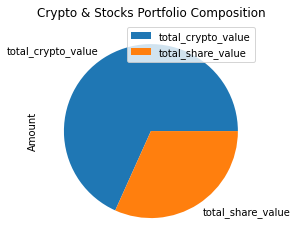

In [295]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount", title="Crypto & Stocks Portfolio Composition")

In [305]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

total_savings = total_crypto_value + total_share_value

# Validate saving health
# YOUR CODE HERE!

if total_savings > emergency_fund:
    print(f"Congratulations! Your total savings is greater than your emergency fund requirements! You are safe!")
else:
    print(f"Your total savings is less than your emergency fund! Take action now to become safe!")

Congratulations! Your total savings is greater than your emergency fund requirements! You are safe!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [306]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [310]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.tail()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-04-26 00:00:00-04:00  114.74  114.8015  114.65  114.65  2867784  417.44   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.37  114.37  3421667  417.91   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.20  114.44  6185936  417.81   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.09  114.37  5796983  420.33   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.33  114.50  5160765  417.63   

                                                               
                             high       low   close    volume  
time                                                           
2021-04-26 00:00:00-04:00  418.22  416.8111  417.64  44689009  
2021-04-27 00:00:00-04:00  418.14  416.3000  417.48  45962264  
2021-04-28 00:00:00-04:00  419.01  416.9000  417.35  45533863  
2021-04-29 00:00:00-04:00  420.72  416.4400  419.98  70595229  
2021-04-30 00:00:00-04:00  418.54  416.3400  417.30  73129109

In [325]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [326]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959   
2020-07-15 00:00:00-04:00  118.50  118.70  118.50  118.635  3108307   
2020-07-16 00:00:00-04:00  118.83  118.89  118.74  118.790  3215937   
2020-07-17 00:00:00-04:00  118.94  118.99  118.77  118.860  2451388   
2020-07-20 00:00:00-04:00  119.03  119.06  118.91  118.980  3453764   

                                           SPY                            \
                          daily_return    open    high      low    close   
time                                                                       
2020-07-14 00:00:00-04:00          NaN  313.30  319.76  312.000  318.890   
2020-07-15 00:00:00-04:00    -0.000169  322.41  323.04  319.265  321.865   
2020-07-16 00:00:00-04:00     0.001307  319.79  321.28  319.090  320.810   
2020-07-17 00:00:00-04:00     0.000589  321.88  322.57  319.735  321.670   
2020-07-20 00:00:00-04:00     0.001010  321.43  325.13  320.620  324.360   

                                                  
                             volume daily_return  
time                                              
2020-07-14 00:00:00-04:00  79292036          NaN  
2020-07-15 00:00:00-04:00  75854842     0.009329  
2020-07-16 00:00:00-04:00  47848514    -0.003278  
2020-07-17 00:00:00-04:00  53682925     0.002681  
2020-07-20 00:00:00-04:00  48315472     0.008363

In [327]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\antho\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995742,1.002072,0.996816,1.003393,0.990853,1.004602,0.998462,1.016176,1.007858,0.995339,...,0.996949,0.999078,0.997758,1.002724,0.998532,1.005041,0.997830,1.000641,1.006678,1.002206
2,0.994513,0.999976,1.005250,0.997868,0.988465,1.013757,0.993032,1.020292,1.006496,0.990946,...,0.990013,0.997146,0.994500,1.004855,0.991674,1.007769,0.990716,1.008082,1.010682,1.007512
3,0.993972,1.003342,1.013704,0.984192,0.980894,1.011936,0.989593,1.013258,0.996026,0.982399,...,0.986628,0.994995,0.992817,0.995793,0.996836,1.019517,0.995070,1.000572,1.014217,1.013618
4,1.000294,1.003222,1.022410,0.991852,0.978945,1.020869,0.999987,1.005851,0.998795,0.980100,...,0.982526,0.993761,0.998413,0.993457,0.985682,1.012792,0.997347,0.998979,1.018638,1.017929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,216.461304,459.695404,272.896229,148.151108,227.238554,503.872985,239.076495,358.426373,676.216199,247.134005,...,306.680097,598.179161,238.938509,384.540410,218.115527,162.420703,586.229266,308.628989,386.622906,351.993772
7557,218.529377,463.330694,273.578562,148.798638,229.106469,511.247546,238.789429,361.036574,684.023508,247.831918,...,307.937864,597.150480,236.126205,387.586468,217.496346,161.879682,585.751761,306.856074,390.868464,351.732663
7558,218.065934,468.176016,275.356818,149.698948,229.463242,512.485346,237.398765,359.250786,680.765423,249.077382,...,307.841254,594.677774,235.697492,389.148748,218.339615,161.777768,582.185879,310.670679,391.882801,352.032267
7559,220.832296,471.167174,273.832535,149.318343,229.999697,510.678291,236.778858,359.482686,677.816350,250.983309,...,308.813683,595.863269,233.769827,391.632897,219.699161,159.863814,581.706068,312.038320,394.920532,355.863806


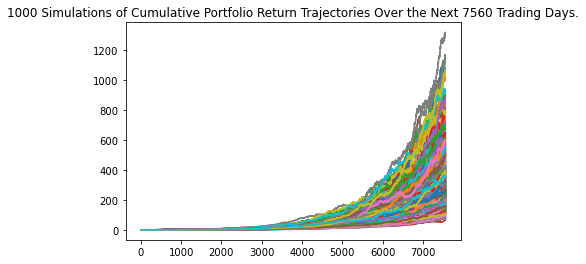

In [331]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist.plot_simulation()

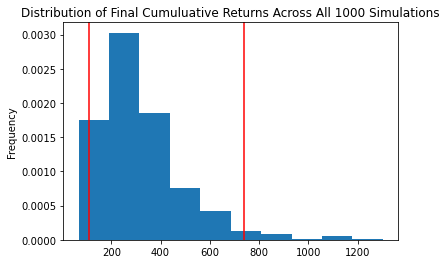

In [332]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [333]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

summary_stats = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats)

count           1000.000000
mean             318.249883
std              170.146871
min               66.743392
25%              202.006399
50%              278.759590
75%              393.214022
max             1302.506130
95% CI Lower     107.316583
95% CI Upper     739.612471
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [337]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${20000} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $2146331.65 and $14792249.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [339]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(summary_stats[8]*initial_investment_2,2)
ci_upper = round(summary_stats[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $3219497.48 and $22188374.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [329]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [330]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\antho\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998076,1.011172,0.989811,0.999879,1.002131,1.011740,1.001601,0.997225,1.003468,1.006461,...,1.002458,0.995146,1.000088,1.002970,1.000325,1.001859,1.002231,0.997849,0.997547,1.004685
2,1.000484,1.020437,0.995379,0.997949,0.996583,1.008314,1.011312,0.982657,0.994418,1.013766,...,1.008059,1.001613,0.999036,1.004652,1.003894,1.001285,1.009932,1.002609,0.999593,1.003936
3,0.996924,1.019464,0.987809,0.996764,0.995950,1.008974,1.006443,0.988585,0.994791,1.010519,...,1.017905,0.989584,1.001555,1.006612,1.001608,1.002721,1.019936,1.008128,1.002919,1.002475
4,0.996556,1.013628,0.979789,0.982689,0.998381,1.012374,0.998175,0.996031,0.980680,1.014273,...,1.025325,0.983600,1.000948,1.004846,1.006559,1.009076,1.022823,1.000843,1.013133,1.000975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.856899,2.309200,2.780791,2.613265,3.834938,2.514483,2.150369,1.858094,1.871141,2.442411,...,2.566590,2.948804,2.073481,2.848110,2.688271,2.737126,3.514640,3.398195,2.207658,3.027840
1257,2.864179,2.308808,2.783089,2.583628,3.821480,2.526147,2.156277,1.862244,1.868329,2.437955,...,2.565460,2.952162,2.072351,2.837736,2.687329,2.737008,3.519705,3.394815,2.190771,3.025473
1258,2.862207,2.322030,2.788084,2.585691,3.862401,2.518109,2.154501,1.862005,1.869859,2.451420,...,2.568654,2.974325,2.091300,2.823525,2.691533,2.732776,3.547091,3.383076,2.177853,3.007087
1259,2.836546,2.315649,2.786050,2.581276,3.880512,2.505879,2.151500,1.856564,1.861637,2.461287,...,2.576129,2.949389,2.089077,2.807806,2.717349,2.739702,3.545815,3.409507,2.181972,2.997669


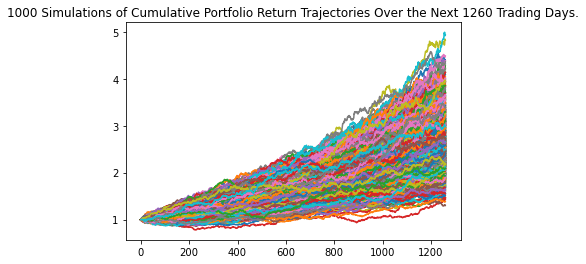

In [345]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist_5.plot_simulation()

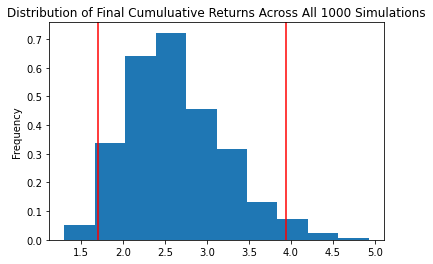

In [342]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist_5.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [352]:
# Set initial investment
# YOUR CODE HERE!
intial_investment_3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower = round(summary_stats[8]*intial_investment_3,2)
ci_upper = round(summary_stats[9]*intial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${intial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_lower}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $6438994.96 and $6438994.96


### Ten Years Retirement Option

In [343]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [346]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\antho\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995556,0.995980,1.007868,0.999261,1.002579,1.001405,1.002775,0.994500,0.992016,1.011566,...,1.001526,1.002851,0.993194,1.013802,1.007833,0.994488,1.008373,0.992841,0.998182,0.998867
2,0.997943,0.995879,1.009513,0.994197,0.993149,1.003997,1.009175,1.003371,0.993138,1.012920,...,0.993485,0.998653,1.000735,1.021426,1.019850,0.990994,1.014370,1.001547,0.996607,0.993120
3,1.001013,0.991365,1.000798,0.995746,0.995149,1.003387,1.011107,0.999111,0.993202,1.011780,...,0.987475,0.992582,1.003701,1.027874,1.021252,1.001190,1.006835,0.989742,0.988748,0.992766
4,1.002449,1.008341,1.007720,0.989591,0.996016,1.007357,1.009776,1.000140,0.988266,1.008329,...,0.980491,0.992236,1.008298,1.032192,1.033757,1.004128,1.003776,0.994594,0.973494,0.989522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.126954,8.110938,5.793478,4.614930,5.236015,6.818619,9.036088,6.814146,8.466787,6.699669,...,7.487722,7.039720,6.272810,5.695784,5.538250,6.034283,8.420209,9.127164,8.083448,7.411588
2517,6.132072,8.116844,5.835477,4.617953,5.257212,6.840003,9.070135,6.790203,8.470144,6.724656,...,7.492540,7.106074,6.268907,5.676323,5.532262,6.042287,8.423464,9.097317,8.129376,7.425703
2518,6.084297,8.111256,5.795259,4.598662,5.222324,6.821301,9.077706,6.779761,8.531988,6.661950,...,7.514605,7.112136,6.220320,5.616378,5.561351,6.064632,8.373388,9.190427,8.029339,7.509611
2519,6.159280,8.012512,5.819542,4.567344,5.203281,6.762344,9.078309,6.789985,8.512403,6.713299,...,7.546979,7.211807,6.174286,5.630969,5.589051,6.057838,8.444153,9.205715,8.058098,7.472256


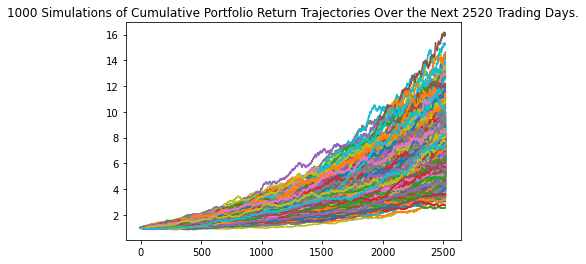

In [347]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist_10.plot_simulation()

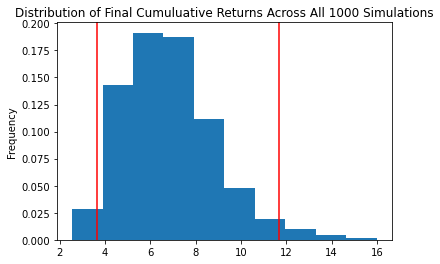

In [348]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist_10.plot_distribution()

In [350]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

summary_stats_1 = MC_even_dist_10.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_stats_1)

count           1000.000000
mean               6.842683
std                2.032889
min                2.553734
25%                5.312864
50%                6.652770
75%                8.004647
max               15.983826
95% CI Lower       3.658333
95% CI Upper      11.666973
Name: 2520, dtype: float64


In [355]:
# Set initial investment
# YOUR CODE HERE!

intial_investment_60000 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(summary_stats[8]*intial_investment_60000,2)
ci_upper_ten = round(summary_stats[9]*intial_investment_60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${intial_investment_60000} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $6438994.96 and $44376748.24
